
#<font color='red'>***Machine Learning Metrics:***</font>


Notebook written by <font color='red'>***Pranav Chellagurki***.</font>

Contents:

- Specificity and Selectivity
- ROC and AUC
- Bias and Variance
- Overfitting and Underfitting
- Precision and Recall

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sb
import matplotlib.pyplot as plt

Most problem statements can be solved by using various Machine Learning approaches. 
\
\
For example: 
\
If you were asked to predict if a loan applicant is eligible for a loan, you can either choose to use logistic regression, or you can alternatively choose to use Decision trees.
(If you are unaware of these algorithms, just know that these are just placeholders. You can replace them with X and Y for your understanding)
\
\
Even if you were to choose a more simplistic approach like logistic regression, you still need to figure out the correct value for the threshold. That is, EVEN if you were to somehow figure out that a particular model works best for your data, you still would need to select the correct set of model parameters.
\
\
Model selection and tuning are as important as data collection. Together, they ensure that you are putting your best foot forward.
\
\
One way to compare two Models X and Y are by building the confusion matrix for the two and comparing their results.
\
\
Let us create a confusion matrix for a model which predicts whether a person is tall or not tall.


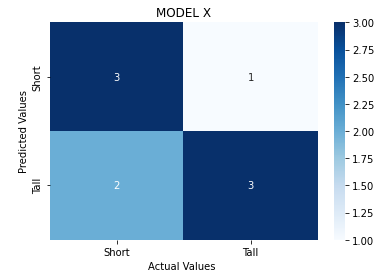

In [ ]:
ground_truth = [0,1,1,1,1,1,0,0,0]
predictions = [1,1,1,1,0,0,0,0,0]
mat = confusion_matrix(ground_truth, predictions)
ax = sb.heatmap(mat, annot=True, cmap='Blues')
ax.set_title('MODEL X')
ax.xaxis.set_ticklabels(['Short','Tall'])
ax.yaxis.set_ticklabels(['Short','Tall'])
ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ');

The above confusion matrix can be interpreted as follows:
\
A total of 9 people participated in testing the performance of the model.
\
4 are tall people.
\
5 are short people.
\
\
**Confusion matrix summary:**
- The model correctly predicted 3 out of 4 people to be tall. Match the tall on the X-axis - Actual values, with the tall on the Y-axis - predicted value. This is called **TRUE POSITIVE**.

- The model correctly predicted 3 out of the 5 people to be short (not tall). Match the short on the X-axis - Actual values, with the short on the Y-axis - predicted value. this is called **TRUE NEGATIVE**.

- The model WRONGLY predicts 2 short people to be tall. This is called **FALSE POSITIVE**.

- The model WRONGLY predicts 1 tall person to be short. This is called **FALSE NEGATIVE**.


Now what percentage of tall people were correctly predicted to be tall? 
\
Total tall people = 4
\
Correctly predicted = 3
\
\
percentage of correct postive predictions = 3/4 = 0.75.
\
\
Alternatively, it can be written as:

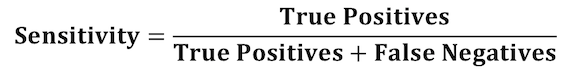

Yes, we just calculated **sensitivity**! In simple terms, it just gives us the percentage of TRUE POSITIVES to the total sum of TRUE POSITIVE and FALSE negative, ie, the total number of tall people in this example.

Similarly, you can calculate the percentage of short people who were correctly classified as short.
\
\
Total short people = 5
\
Correctly predicted = 3
\
\
percentage of correct negative predictions = 3/5 = 0.6
\
\
Alternatively, it can be written as:
\
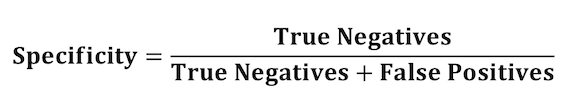

The above confusion matrix was for some model X. Now, as we said before, a problem can be solved by multiple methods. Let us construct the confusion matrix for model Y:

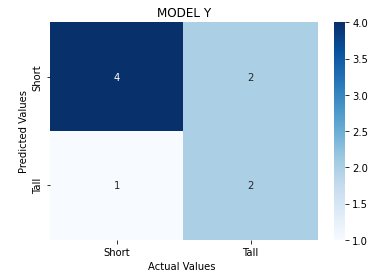

In [ ]:
ground_truth = [0,0,1,1,1,1,0,0,0]
predictions = [1,0,1,1,0,0,0,0,0]
mat = confusion_matrix(predictions, ground_truth)
ax = sb.heatmap(mat, annot=True, cmap='Blues')
ax.set_title('MODEL Y')
ax.xaxis.set_ticklabels(['Short','Tall'])
ax.yaxis.set_ticklabels(['Short','Tall'])
ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ');

**Confusion matrix summary:**
- The model correctly predicted 2 out of 4 people to be tall. Match the tall on the X-axis - Actual values, with the tall on the Y-axis - predicted value. This is called **TRUE POSITIVE**.

- The model correctly predicted 4 out of the 5 people to be short (not tall). Match the short on the X-axis - Actual values, with the short on the Y-axis - predicted value. this is called **TRUE NEGATIVE**.

- The model WRONGLY predicts 1 short person to be tall. This is called **FALSE POSITIVE**.

- The model WRONGLY predicts 2 tall people to be short. This is called **FALSE NEGATIVE**.
\
\
\
The sensitivity and specificity for model Y:
\
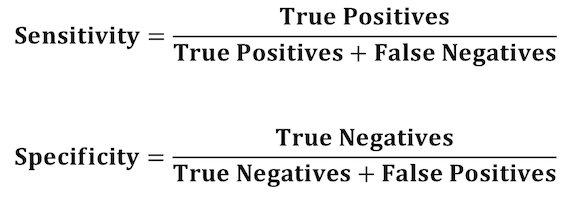


The sensitivity for model X is greater than for model Y. But, the specificity of model Y is greater than that of model X.
\
\
If classifying short people correctly was more important, then you would choose model Y. If classifying tall people correctly was of more importance, you would choose model X.

Think of this logic in a more critical scenario. Let us assume that you were tasked to build a model that predicts if a person has heart disease or not, and the utmost priority is to be given to classifying people with heart diseases correctly.
\
\
You first use logistic regression and plot the confusion matrix, and calculate sensitivity and specificity as:
\
sensitivity: 0.81
\
specificity: 0.63
\
\
You then use random forests algorithm and calculate sensitivity and specificity as:
\
sensitivity: 0.74
\
specificity: 0.93
\
\
Which model would you choose?
\
The logistic regression model! Because sensitivity represents the percentage of patients with heart disease who were correctly identified!


# ROC and AUC:

Let us go back to the Tall person classifier. In logistic regression, the output is governed by the threshold that the designer sets. If you were to set the threshold as 0.5, any data tuple which produces a result more than 0.5 WIll be classified as tall. 
\
\
You can probably imagine that varying this threshold would drastically vary the performance of the model. IF you were to choose a very low threshold, you would classify almost all the tall people correctly, but, the low threshold also gives rise to a large number of false positives. That is, even short people are being classified as tall. 
\
\
On the flip side, if you set a very high threshold value, you are essentially placing a high standard on your positives. The number of false positives would drastically reduce, but, it would also mean that you are increasing the number of false negatives.
\
\
Hence, choosing a good value for the threshold of the model is of paramount importance. One way to find a good value for the model parameters (Threshold in our case) is to use ROC.
\
\
before we proceed with the actual implementation, think about a scenario where you were to buy a laptop.
\
\
There are several laptops, each priced at drastically different prices.
You want the laptop to maximize your productivity, while also not breaking your bank. 
\
\
Let us plot a graph to visualize this:

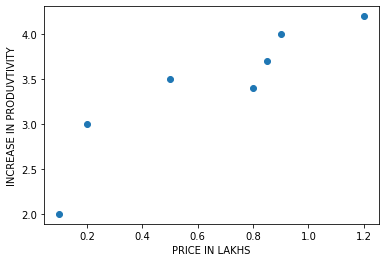

In [ ]:
x=[0.1,0.2,0.5,0.8,0.85,0.9,1.2]
y=[2,3,3.5,3.4,3.7,4, 4.2]

plt.scatter(x, y)
plt.xlabel('PRICE IN LAKHS')
plt.ylabel('INCREASE IN PRODUVTIVITY')
plt.show()

You are tempted to buy the laptop which provides the maximum increase in productivity, but, the price of the laptop is simply too expensive. Even for a very good laptop, 1.2 Lakhs is unreasonable. 
\
\
Okay, so from the initial feedback, it looks like we want to keep the cost to a minimum. Can we just select the least expensive laptop? No! Although 10,000 seems like a meager amount, it performs extremely poorly when compared to the other laptops.
\
\
Hence, you might probably be thinking of buying a laptop, with a decent price, with a relatively good increase in productivity.
\
\
NOTE: The ideal scenario would be that the cheapest laptop provides the HIGHEST productivity. In most cases, this does not exist.
\
\
This is essentially how ROC works! We plot the True positives against the False positives and try to pick a point that tries to keep the false positive (Price in our example) to a minimum while maximising the value of True Positives (Productivity in our example)

Now, lets say EVEN before trying to pick the laptop, you have to decide between two stores.
\
\
Lets say that the ROC curve for Target and croma Best Buy like this:

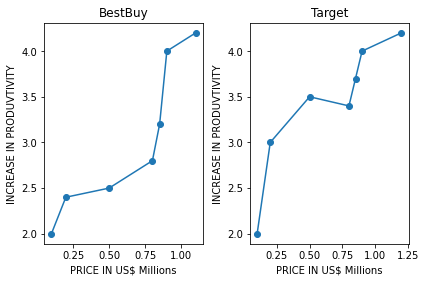

In [ ]:
plt.subplot(1, 2, 1)
x=[0.1,0.2,0.5,0.8,0.85,0.9,1.1]
y=[2,2.4,2.5,2.8,3.2,4, 4.2]
plt.scatter(x, y)
plt.plot(x,y)
plt.xlabel('PRICE IN US$ 1000s')
plt.ylabel('INCREASE IN PRODUVTIVITY')
plt.title('BestBuy')
plt.subplot(1, 2, 2)
x=[0.1,0.2,0.5,0.8,0.85,0.9,1.2]
y=[2,3,3.5,3.4,3.7,4, 4.2]
plt.scatter(x, y)
plt.plot(x,y)
plt.xlabel('PRICE IN US$ 1000s')
plt.ylabel('INCREASE IN PRODUVTIVITY')
plt.title('Target')
plt.tight_layout(1)
plt.show()

**NOTE**: The dots have been connected simply to help visualize. They do not carry any extra meaning.

CROMA! For more or less the same price, the laptops in chroma seem to provide a much better increase in productivity!
\
\
This can be visualized by looking at the Area Under the Curve or AUC!
\
\
NOTE: In actual ROC graphs, different graphs ALL have normalized x and y-axis. That is, the true positive rate(Y-axis) ranges from 0-1(0-100%). The False positive rate(X-axis) ranges from 0-1(0-100%).
\
Hence, they provide a uniform result which makes comparison between ROCs and AUCs possible.

The fourmula for the Y-axis in the ROC is given as:
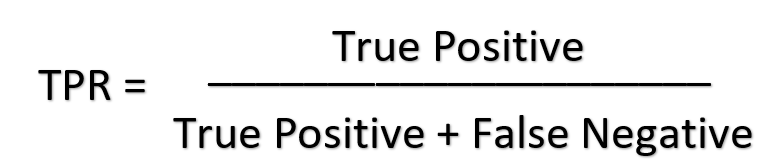

TPR = True Positivity Rate. This is the same as the fourmula to calculate sensitivity. Which gives us the Percentage of True Positives.

The Y-AXIS of the ROC curve tells us about the False Positivity Rate.
\
That is the number of ACTUAL NEGATIVES that were classified incorrectly as POSITIVE by our model.
\
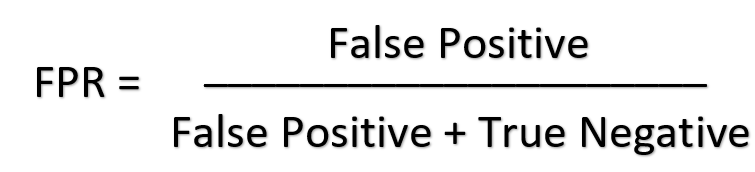

Let us take a second to demystify the above formulas.
\
**TPR(sensitivity)** should tell us the percentage of positives that were correctly predicted.
\
**The numerator** of TPR gives us the TRUE POSITIVES, that is, the number of inputs that were positive, and were also correctly predicted by our model.
\
\
**The denominator** provides us the sum of TRUE POSITIVE and FALSE NEGATIVE.
\
Think about it, the FALSE NEGATIVES are the inputs that were positive but were labeled as negative.
\
Hence, the total number of POSITIVE cases = TRUE POSITIVE + FALSE NEGATIVE.

# **We want to MAXIMISE TPR.**

Similarly, FPR provides us the percentage of NEGATIVES that were WRONGLY predicted by our model as being POSITIVE.
# **We want to MINIMISE FPR**

Let us take an example:
\
Say in logistic regression (Where the output is governed by the threshold), we set the threshold to a 0.1 (CASE 1)
\
\
Observation:

- Because of the LOW threshold, ALL the POSITIVE cases will be correctly predicted as POSITIVE. This results in a very HIGH TPR.
- Because of the LOW threshold, NEGATIVE samples, will also be labeled as POSITIVE. This results in a very HIGH FPR.

CASE 2: Threshold is set at 0.9
\
\
Observation:
- Because of the HIGH threshold, NOT ALL POSITIVE cases will be correctly predicted as POSITIVE. Resulting in a LOW TPR.
- Because of the HIGH threshold, MOST of the NEGATIVE cases will be filtered out. Resulting in a LOW FPR.

Which threshold do we choose? If predicting the POSITIVE cases was MORE important, and don't really care about labeling negative cases also positive, then we would choose CASE 1.
\
\
This can be thought of as the threshold to predict if a person is COVID +ve. To prevent an outbreak, the health authorities may choose to increase their TPR, while being okay with a high FPR. ALL in an effort to curb the virus.
\
\
Now, if minimizing FPR was more important than maximising TPR, then you would choose CASE 2.
\
\
Think of a Bank which provides loans to potential customers. They are extremely selective and want to provide loans ONLY to customers with a HIGH threshold score. They want to minimize the number of possible defaulters. This could mean that they might lose out on a bunch of good applicants too. In this case, FPR is given a higher priority than TPR.

# BIAS AND VARIANCE:

Imagine that you are preparing for a test for subject X. Somehow, you were able to successfully obtain the question paper beforehand. Day in and day out, all you do is ONLY practice the questions THAT you know WILL appear on the day of the exam, and sure enough, they did! You were able to ace the test, and you even topped the class!
\
\
A few days later you appear for a job interview for a role that requires you to have knowledge about subject X. The interviewer asks you a simple question about subject X (which was not present on the question paper). Being the topper, you are expected to answer this rather simple question, but, you fail to come up with a reply! This is because ALL you did was study ONLY the questions that were supposed to appear on the test. While you ended up mastering an extremely narrow sliver of knowledge, you were unable to pick up the general ideas of the subject.
\
\
What we just discussed was the concept of Bias and Variance in Machine Learning.
\
\
When a model performs EXTREMELY GOOD on the training set, you say that the model has a **LOW BIAS.**

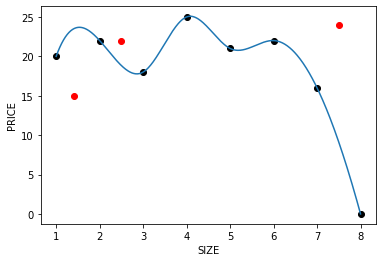

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([20, 22, 18, 25, 21, 22, 16, 0])

cubic_interploation_model = interp1d(x, y, kind = "cubic")

X_=np.linspace(x.min(), x.max(), 500)
Y_=cubic_interploation_model(X_)
x_test = [1.4, 2.5, 7.5]
y_test = [15, 22, 24]
plt.scatter(x_test, y_test, color='red')
plt.plot(X_, Y_)
plt.scatter(x, y, color='black')
plt.xlabel("SIZE")
plt.ylabel("PRICE")
plt.show()


In the above graph, we are plotting the TRAINING SET values in BLACK.\
The TESTING SET values have been plotted in RED.
\
\
Assume that we use a Machine Learning model to fit a curve to the training DATA (Eg: Polynomial regression)
\
We can clearly see that we achieve 100% accuracy on the TRAINING SET. That is, we are able to train the model to overly specialize to the training set. 
\
\
But, what about testing data?
\
\
MOST machine learning models are built to predict UNSEEN data. Think about it, if your main goal was to predict data that you already have an answer for, why would you use ML? You can just build a very basic search function that looks up the relevant entry and returns the result.
\
\
For the testing set, the model predicts data with a high margin of error. We say that this model has a **HIGH VARIANCE**. That is, the performance of the model is almost unpredictable. The lack of consistency makes it impossible to use this model in a real-world scenario (such as heart disease prediction).

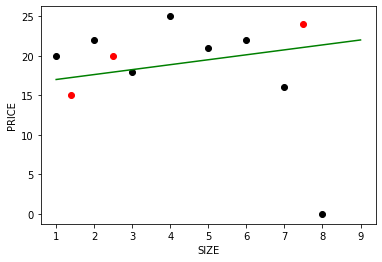

In [ ]:
import matplotlib.pyplot as plt 
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([20, 22, 18, 25, 21, 22, 16, 0])
x_test = [1.4, 2.5, 7.5]
y_test = [15, 20, 24]
plt.scatter(x_test, y_test, color='red')
plt.scatter(x, y, color='black')
plt.plot([1, 9], [17, 22],color="green")
plt.xlabel("SIZE")
plt.ylabel("PRICE")
plt.show()

Now for the SAME data, let us use a more simplistic approach to fit a line to the data (Eg: Linear regression).
\
\
The model is unable to predict the training set data with 100% accuracy. That is, no matter what you do, the model will NOT be able to specialize itself to the training set. WE say that this model has a **HIGH BIAS**.
\
\
But, look at the testing data points (in RED). Are they closer to the line than they were to the curve? 
\
\
YES! Although the model has a HIGH BIAS, it performs relatively well on unseen data. WHICH IS WHY WE NEED IT IN THE FIRST PLACE!.
\
\
We can say that the model has a **LOW VARIANCE**. You can expect the model to perform consistently on different unseen datasets. Hence, making it usable in real-world scenarios.
\
\
Ideally, we want to design a model which achieves really good performance on both the training and testing set.
\
LOW BIAS, and LOW VARIANCE.
\
\
But, in reality, it is really hard to design such a system.

We can now also take about **OVERFITTING and UNDERFITTING**.
\
\
It is an extension of BIAS. If the model performs OVERLY GOOD on the training set, we say that the model has **OVERFIT** the data (In other words, VERY LOW BIAS)
\
\
If the model performs very poorly on the training set, then we say that the model has **UNDERFIT** the training set. (In other words VERY HIGH BIAS).
\
\
The key is to balance the fit. So that it neither OVERFITS nor UNDERFITS the data. Figuring out the sweet spot is the key to machine learning.

# PRECISION, RECALL, and ACCURACY
You are tasked with building a model for predicting if a particular patient should be given DRUG X or NOT.
\
\
Let us say that the number of patients is 100.
\
Patients with illness X: 8
\
Patients without illness X: 92
\
\
You build a model which correctly classifies ALL the patients without illness X. But, fails to classify patients WITH illness X.
\
If we were to calculate the accuracy of such a system:
\
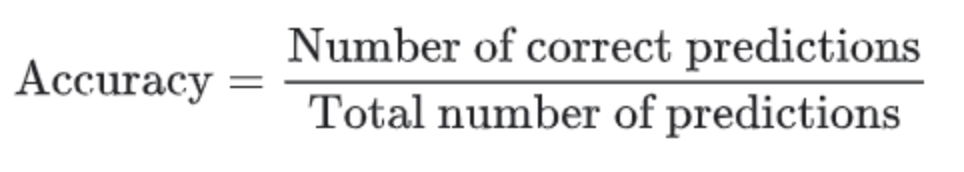

The number of correct classifications of patients X WITHOUT illness X: 92.
\
The number of correct classifications of patients X WITH illness X: 0.
\
\
Accuracy = (92+0)/100 = 0.92.
\
\
The accuracy of such a system is 92%. But, this metric is EXTREMELY misleading. This system fails to CLASSIFY ANY of the patients with illness X. If this was developed to detect a more critical case such as heart diseases, we would be wrongly classifying ALL the patients with heart diseases.
\
\
Hence, we need a better metric than just plain old accuracy.
\
The answer is **RECALL**!
\
\
Recall gives us the percentage of TRUE POSITIVEs to the TOTAL NUMBER OF POSITIVES.
\
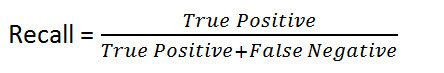
\
\
**NOTE**: Recall is the same as Sensitivity.


---




Now, let us consider the same scenario
\
\
You are tasked with building a model for predicting if a particular patient should be given DRUG X or NOT.
\
\
**Patients with illness X: 92**
\
**Patients without illness X: 8**



**The pre-requiste knowledge is that if DRUG X is administered on patients not suffering from illiness X, it causes side effects such as headache and body pains.**

If you built a model which CORRECTLY classifies ALL the paitents with illness X, but, WRONGLY classifies ALL paitents WITHOUT illness X, then:
\
\
For such a system, the RECALL would be:
\
\
recall = 8/8 = 1.
\
100%
\
\
But, is that a good metric for this scenario? Remember that we also care about paitients wrongly classified and asked to take drug X. 
\
\
We need a metric to check how many paitents who have been CLASSIFED as +ve are truly +ve. That is eactly what **precision** does!
\
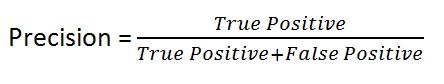

Let us take a second to demystify the formula:
\
\
**Numerator**: The number of +ve classifications that were in fact +ve.
\
**Denominator**: A combination of the number of correct and wrong +ve classifications. Essentially, the total count of patients who are predicted to be +ve by our model.
\
\
We had predicted 8 patients correctly, and 92 patients incorrectly.
\
\
Precision = (8/100) = 0.08
\
\
This means that although we can successfully identify ALL the patients WITH an illness X, we have a HUGE tradeoff here. The precision of our predictions is VERY VERY LOW. Hence, based on the use case, we might choose to move to a different algorithm.
\
Remember, WE would want to **MAXIMIZE** precision!



---

